  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.4.2 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



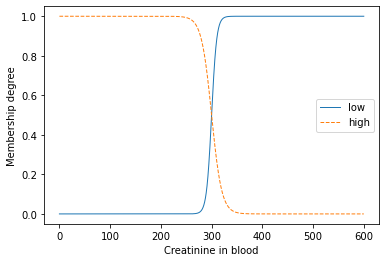

 * Detected Sugeno model type
{'Sepsis': 68.90324203600152}


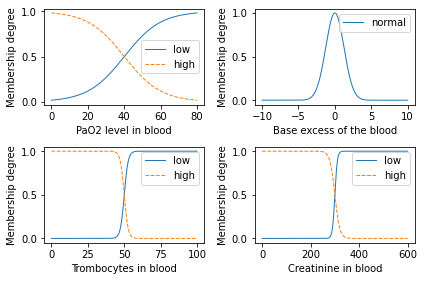

In [9]:
# Code modified for Code Ocean publication
from simpful import *

# A simple decision support model to diagnose sepsis in the ICU
# Create a fuzzy system object
FS = FuzzySystem()

# Define fuzzy sets for the variable PaO2
P1 = FuzzySet(function=Sigmoid_MF(c=40, a=0.1), term="low")
P2 = FuzzySet(function=InvSigmoid_MF(c=40, a=0.1), term="high")
LV1 = LinguisticVariable([P1,P2], concept="PaO2 level in blood", universe_of_discourse=[0,80])
FS.add_linguistic_variable("PaO2", LV1)

# Define fuzzy sets for the variable base excess
B1 = FuzzySet(function=Gaussian_MF(mu=0,sigma=1.25), term="normal")
LV2 = LinguisticVariable([B1], concept="Base excess of the blood", universe_of_discourse=[-10,10])
FS.add_linguistic_variable("BaseExcess", LV2)

# Define fuzzy sets for the variable trombocytes
T1 = FuzzySet(function=Sigmoid_MF(c=50, a=0.75), term="low")
T2 = FuzzySet(function=InvSigmoid_MF(c=50, a=0.75), term="high")
LV3 = LinguisticVariable([T1,T2], concept="Trombocytes in blood", universe_of_discourse=[0,100])
FS.add_linguistic_variable("Trombocytes", LV3)

# Define fuzzy sets for the variable creatinine
C1 = FuzzySet(function=Sigmoid_MF(c=300, a=0.2), term="low")
C2 = FuzzySet(function=InvSigmoid_MF(c=300, a=0.1), term="high")
LV4 = LinguisticVariable([C1,C2], concept="Creatinine in blood", universe_of_discourse=[0,600])
FS.add_linguistic_variable("Creatinine", LV4)
LV4.plot()

# Define the consequents
FS.set_crisp_output_value("low_probability", 1)
FS.set_crisp_output_value("high_probability", 99)

# Define the fuzzy rules
RULE1 = "IF (PaO2 IS low) AND (Trombocytes IS high) AND (Creatinine IS high) AND (BaseExcess IS normal) THEN (Sepsis IS low_probability)"
RULE2 = "IF (PaO2 IS high) AND (Trombocytes IS low) AND (Creatinine IS low) AND (NOT(BaseExcess IS normal)) THEN (Sepsis IS high_probability)"

# Add fuzzy rules to the fuzzy reasoner object
FS.add_rules([RULE1, RULE2])

# Set antecedent values
FS.set_variable("PaO2", 50)
FS.set_variable("BaseExcess", -1.5)
FS.set_variable("Trombocytes", 50)
FS.set_variable("Creatinine", 320)

# Perform Sugeno inference and print output
print(FS.Sugeno_inference(["Sepsis"]))

# Plotting code
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2)
LV1.draw(ax=ax[0][0])
LV2.draw(ax=ax[0][1])
LV3.draw(ax=ax[1][0])
LV4.draw(ax=ax[1][1])
plt.tight_layout()
plt.savefig("sepsis_mfs.pdf", bbox_inches='tight')

In [3]:
pip install simpful

Note: you may need to restart the kernel to use updated packages.


  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.4.2 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)

 * Detected Sugeno model type


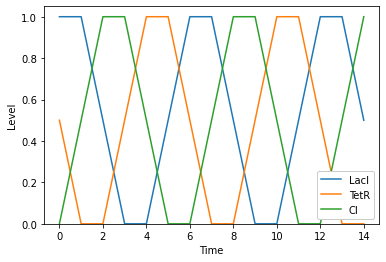

In [11]:
# Code modified for Code Ocean publication
from simpful import *
from copy import deepcopy

# A simple dynamic fuzzy model of the repressilator
# Create a fuzzy reasoner object
FS = FuzzySystem()

# Define fuzzy sets and linguistic variables
LV = AutoTriangle(2, terms=['low', 'high'])
FS.add_linguistic_variable("LacI", LV)
FS.add_linguistic_variable("TetR", LV)
FS.add_linguistic_variable("CI", LV)

# Define output crisp values
FS.set_crisp_output_value("low", 0.0)
FS.set_crisp_output_value("high", 1.0)

# Define fuzzy rules
RULES = []
RULES.append("IF (LacI IS low) THEN (TetR IS high)")
RULES.append("IF (LacI IS high) THEN (TetR IS low)")
RULES.append("IF (TetR IS low) THEN (CI IS high)")
RULES.append("IF (TetR IS high) THEN (CI IS low)")
RULES.append("IF (CI IS low) THEN (LacI IS high)")
RULES.append("IF (CI IS high) THEN (LacI IS low)")
FS.add_rules(RULES)

# Set antecedents values
FS.set_variable("LacI", 1.0)
FS.set_variable("TetR", 0.5)
FS.set_variable("CI", 0.0)

# Set simulation steps and save initial state
steps = 14
dynamics = []
dynamics.append(deepcopy(FS._variables))

# At each simulation step, perform Sugeno inference, update state and save the results
for i in range(steps):
    new_values  = FS.Sugeno_inference()
    FS._variables.update(new_values)
    dynamics.append(new_values)

# Plotting code
import matplotlib.pyplot as plt
lac = [d["LacI"] for d in dynamics]
tet = [d["TetR"] for d in dynamics]
ci = [d["CI"] for d in dynamics]
plt.plot(range(steps+1), lac)
plt.plot(range(steps+1), tet)
plt.plot(range(steps+1), ci)
plt.ylim(0, 1.05)
plt.xlabel("Time")
plt.ylabel("Level")
plt.legend(["LacI","TetR","CI"], loc="lower right",framealpha=1.0)
plt.savefig("repressilator_dynamics.pdf", bbox_inches='tight')

In [16]:
from simpful import *

# A simple fuzzy inference system for the tipping problem
# Create a fuzzy system object
FS = FuzzySystem()

# Define fuzzy sets and linguistic variables
S_1 = FuzzySet(points=[[0., 1.],  [5., 0.]], term="poor")
S_2 = FuzzySet(points=[[0., 0.], [5., 1.], [10., 0.]], term="good")
S_3 = FuzzySet(points=[[5., 0.],  [10., 1.]], term="excellent")
FS.add_linguistic_variable("Service", LinguisticVariable([S_1, S_2, S_3], concept="Service quality"))

F_1 = FuzzySet(points=[[0., 1.],  [10., 0.]], term="rancid")
F_2 = FuzzySet(points=[[0., 0.],  [10., 1.]], term="delicious")
FS.add_linguistic_variable("Food", LinguisticVariable([F_1, F_2], concept="Food quality"))

# Define output crisp values
FS.set_crisp_output_value("small", 5)
FS.set_crisp_output_value("average", 15)

# Define function for generous(food score + service score + 5%)
FS.set_output_function("generous", "Food+Service+5")

# Define fuzzy rules
R1 = "IF (Service IS poor) OR (Food IS rancid) THEN (Tip IS small)"
R2 = "IF (Service IS good) THEN (Tip IS average)"
R3 = "IF (Service IS excellent) OR (Food IS delicious) THEN (Tip IS generous)"
FS.add_rules([R1, R2, R3])

# Set antecedents values
FS.set_variable("Service", 4)
FS.set_variable("Food", 8)

# Perform Sugeno inference and print output
print(FS.Sugeno_inference(["Tip"]))

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.4.2 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)

 * Detected Sugeno model type
{'Tip': 14.777777777777779}


In [13]:
from simpful import *

# A simple fuzzy inference system for the tipping problem
# Create a fuzzy system object
FS = FuzzySystem()

# Define fuzzy sets and linguistic variables
S_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=5), term="poor")
S_2 = FuzzySet(function=Triangular_MF(a=0, b=5, c=10), term="good")
S_3 = FuzzySet(function=Triangular_MF(a=5, b=10, c=10), term="excellent")
FS.add_linguistic_variable("Service", LinguisticVariable([S_1, S_2, S_3], concept="Service quality", universe_of_discourse=[0,10]))

F_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=10), term="rancid")
F_2 = FuzzySet(function=Triangular_MF(a=0, b=10, c=10), term="delicious")
FS.add_linguistic_variable("Food", LinguisticVariable([F_1, F_2], concept="Food quality", universe_of_discourse=[0,10]))

# Define output fuzzy sets and linguistic variable
T_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=10), term="small")
T_2 = FuzzySet(function=Triangular_MF(a=0, b=10, c=20), term="average")
T_3 = FuzzySet(function=Trapezoidal_MF(a=10, b=20, c=25, d=25), term="generous")
FS.add_linguistic_variable("Tip", LinguisticVariable([T_1, T_2, T_3], universe_of_discourse=[0,25]))

# Define fuzzy rules
R1 = "IF (Service IS poor) OR (Food IS rancid) THEN (Tip IS small)"
R2 = "IF (Service IS good) THEN (Tip IS average)"
R3 = "IF (Service IS excellent) OR (Food IS delicious) THEN (Tip IS generous)"
FS.add_rules([R1, R2, R3])

# Set antecedents values
FS.set_variable("Service", 4)
FS.set_variable("Food", 8)

# Perform Mamdani inference and print output
print(FS.Mamdani_inference(["Tip"]))

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.4.2 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)

{'Tip': 14.17223614042091}


In [19]:
from simpful import *

# A simple fuzzy inference system for the tipping problem
# Create a fuzzy system object
FS = FuzzySystem()

# Define fuzzy sets and linguistic variables
D_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=5), term="high")
D_2 = FuzzySet(function=Triangular_MF(a=0, b=5, c=10), term="medium")
D_3 = FuzzySet(function=Triangular_MF(a=5, b=10, c=10), term="low")
FS.add_linguistic_variable("Profundidad", LinguisticVariable([S_1, S_2, S_3], concept="Profundidad de Agua", universe_of_discourse=[0,10]))

R_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=5), term="high")
R_2 = FuzzySet(function=Triangular_MF(a=0, b=5, c=10), term="medium")
R_3 = FuzzySet(function=Triangular_MF(a=5, b=10, c=10), term="low")
FS.add_linguistic_variable("Recarga", LinguisticVariable([R_1, R_2, R_3], concept="Recarga de Agua", universe_of_discourse=[0,10]))

A_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=5), term="high")
A_2 = FuzzySet(function=Triangular_MF(a=0, b=5, c=10), term="medium")
A_3 = FuzzySet(function=Triangular_MF(a=5, b=10, c=10), term="low")
FS.add_linguistic_variable("Acuifero", LinguisticVariable([A_1, A_2, A_3], concept="Tipo de Acuifero", universe_of_discourse=[0,10]))

S_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=5), term="high")
S_2 = FuzzySet(function=Triangular_MF(a=0, b=5, c=10), term="medium")
S_3 = FuzzySet(function=Triangular_MF(a=5, b=10, c=10), term="low")
FS.add_linguistic_variable("Profundidad", LinguisticVariable([S_1, S_2, S_3], concept="Profundidad de Agua", universe_of_discourse=[0,10]))

T_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=5), term="high")
T_2 = FuzzySet(function=Triangular_MF(a=0, b=5, c=10), term="medium")
T_3 = FuzzySet(function=Triangular_MF(a=5, b=10, c=10), term="low")
FS.add_linguistic_variable("Topografia", LinguisticVariable([T_1, T_2, T_3], concept="Topografía de Acuifero", universe_of_discourse=[0,10]))

C_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=5), term="high")
C_2 = FuzzySet(function=Triangular_MF(a=0, b=5, c=10), term="medium")
C_3 = FuzzySet(function=Triangular_MF(a=5, b=10, c=10), term="low")
FS.add_linguistic_variable("Conductividad", LinguisticVariable([C_1, C_2, C_3], concept="Conductividad de Agua", universe_of_discourse=[0,10]))

# Define output fuzzy sets and linguistic variable
RR_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=10), term="high")
RR_2 = FuzzySet(function=Triangular_MF(a=0, b=10, c=20), term="medium")
RR_3 = FuzzySet(function=Trapezoidal_MF(a=10, b=20, c=25, d=25), term="low")
FS.add_linguistic_variable("Riesgo", LinguisticVariable([RR_1, RR_2, RR_3], universe_of_discourse=[0,25]))

# Define fuzzy rules
R1 = "IF (Profundidad IS high) AND (Recarga IS high) AND (Acuifero IS high) AND (Suelo IS high) AND (Topografia IS high) AND (Conductividad IS high) THEN (Riesgo is high)"
R2 = "IF (Profundidad IS medium) AND (Recarga IS medium) AND (Acuifero IS medium) AND (Suelo IS medium) AND (Topografia IS medium) AND (Conductividad IS medium) THEN (Riesgo IS medium)"
R3 = "IF (Profundidad IS medium) AND (Recarga IS medium) AND (Acuifero IS medium) AND (Suelo IS medium) AND (Topografia IS medium) AND (Conductividad IS medium) THEN (Riego IS low)"
FS.add_rules([R1, R2, R3])

# Set antecedents values
FS.set_variable("Profundidad", 4)
FS.set_variable("Recarga", 8)
FS.set_variable("Acuifero", 8)
FS.set_variable("Suelo", 8)
FS.set_variable("Topografia", 8)
FS.set_variable("Conductividad", 8)

# Perform Mamdani inference and print output
print(FS.Mamdani_inference(["Riesgo"]))

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.4.2 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



IndexError: tuple index out of range